# ------------------- Trabalho 01 - analise de Classificação - Base Diabetes ------- #

 base disponivel em: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Alunos: ANDRÉ LUIZ DE ANDRADE - FABRÍCIO RANGEL DE SOUSA

Introdução

A análise da base de dados sobre diabetes é um passo fundamental na compreensão e na construção de modelos preditivos relacionados a essa doença. A base de dados utilizada para essa análise de classificação, disponível na plataforma Kaggle, com o nome de diabetes.csv. O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medições diagnósticas incluídas no conjunto de dados. Extraídos de um banco de dados maior, essa base menor, contém somente um grupo de pacientes do sexo feminino, com pelo menos 21 anos de idade e de origem indiana da pima. Nosso estudo visa fornecer insights valiosos que possam contribuir para a compreensão da diabetes e para a criação de modelos de classificação, capazes de identificar indivíduos em risco de desenvolver essa condição.

In [1]:
# importando as bibliotecas necessárias
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Analisando a base de dados diabetes
base_dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv', sep=',')

# Visualizar as primeiras linhas do DataFrame
base_dados.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# coletando informações da tabela
print(base_dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Por não ter dados nulos podemos seguir a analise

In [11]:
# Definindo o atributo "Resultado" como atributo alvo
display(base_dados.corr()[["Outcome"]])

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


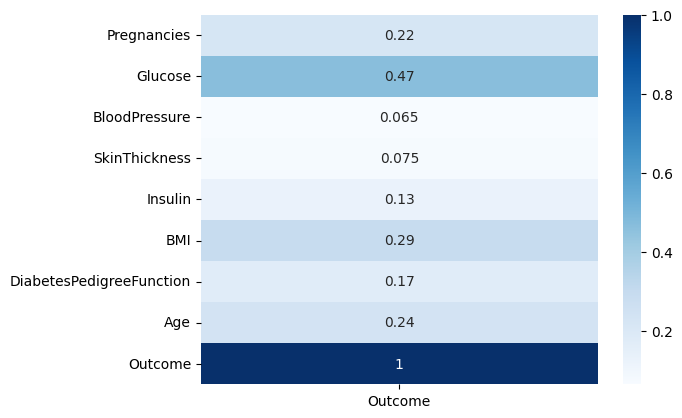

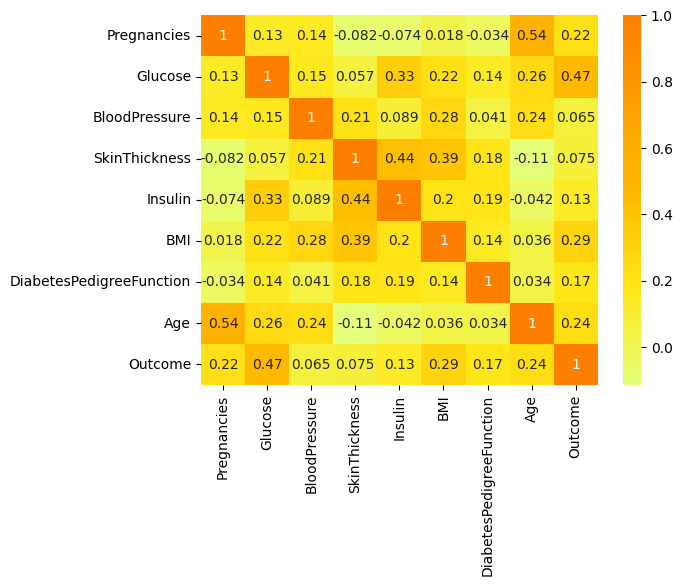

In [12]:
# Mostrando os resultados graficos

sns.heatmap(base_dados.corr()[["Outcome"]], annot=True, cmap="Blues")
plt.show()

sns.heatmap(base_dados.corr(), annot=True, cmap="Wistia")
plt.show()

Observa-se, nestes mapas de calor, que os atributos "BMI" e "Glucose" se destacam, o que iremos comprovar aplicando funções prontas para nosso modelo.

# Executando uma analise descritiva, para entender as estatisticas básicas dos atributos.

In [13]:
# Estatísticas descritivas
print(base_dados.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Como identificamos os atributos BMI e Glucose, como mais relevantes, vamos entender um pouco sobre eles

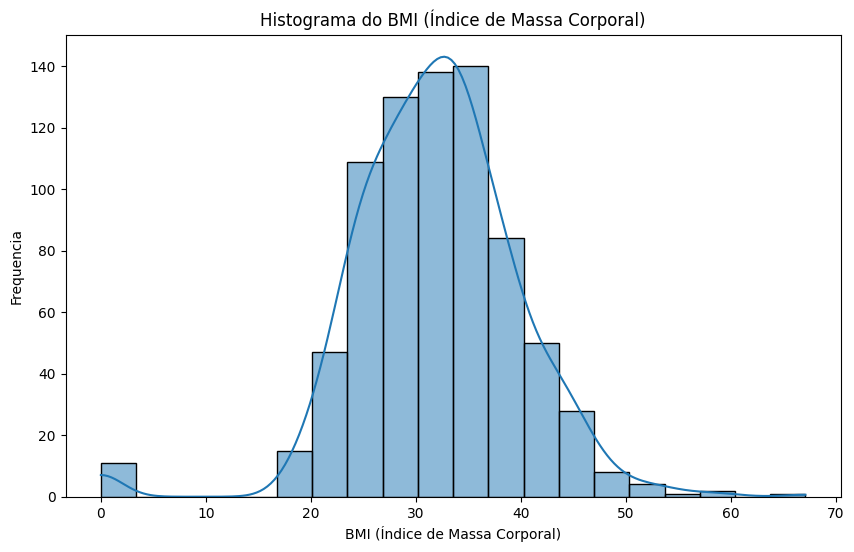

In [6]:
# Visualizando os dados de forma grafica para explorar a base com mais profundidade
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma do indice de massa corporal
plt.figure(figsize=(10, 6))
sns.histplot(base_dados['BMI'], bins=20, kde=True)
plt.xlabel('BMI (Índice de Massa Corporal)')
plt.ylabel('Frequencia')
plt.title('Histograma do BMI (Índice de Massa Corporal)')
plt.show()

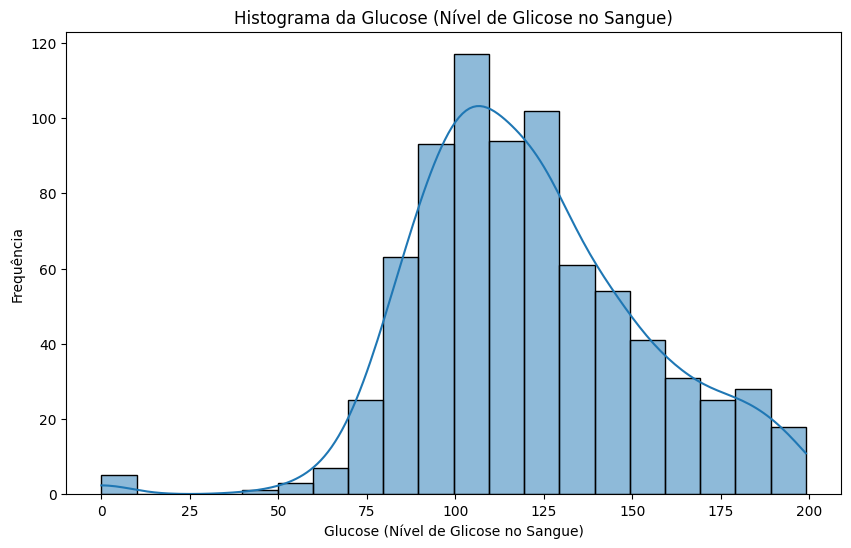

In [7]:
# Histograma do indice de Glucose
plt.figure(figsize=(10, 6))
sns.histplot(base_dados['Glucose'], bins=20, kde=True)
plt.xlabel('Glucose (Nível de Glicose no Sangue)')
plt.ylabel('Frequência')
plt.title('Histograma da Glucose (Nível de Glicose no Sangue)')
plt.show()

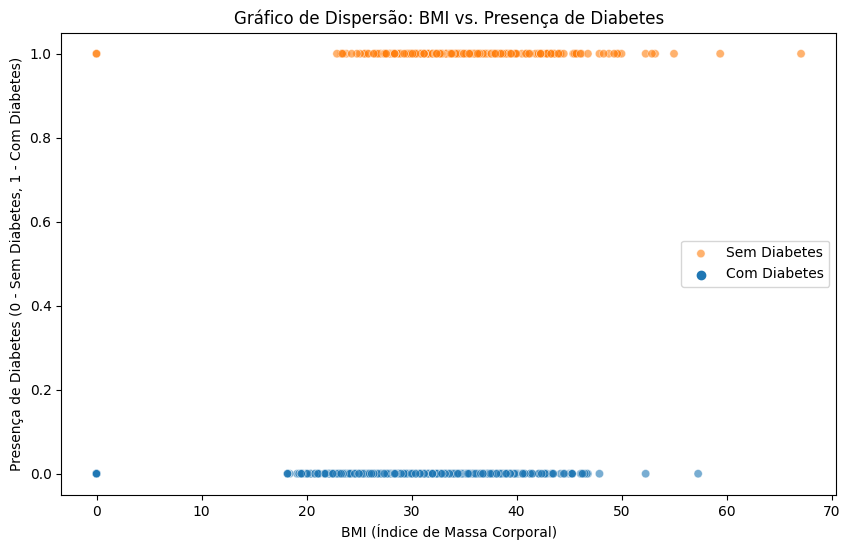

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão BMI vs. Outcome (diabetes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Outcome', data=base_dados, hue='Outcome', alpha=0.6, marker='o')
plt.xlabel('BMI (Índice de Massa Corporal)')
plt.ylabel('Presença de Diabetes (0 - Sem Diabetes, 1 - Com Diabetes)')
plt.title('Gráfico de Dispersão: BMI vs. Presença de Diabetes')
plt.legend(['Sem Diabetes', 'Com Diabetes'])
plt.show()

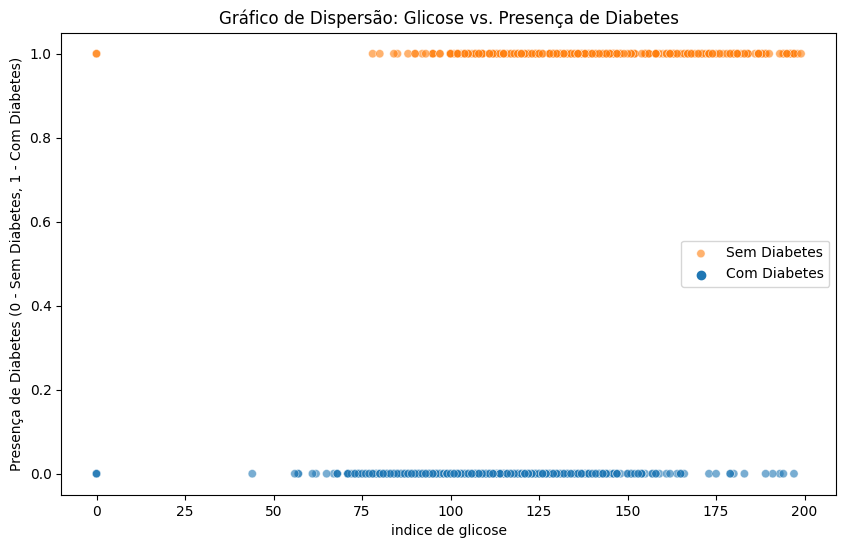

In [9]:
# Gráfico de dispersão BMI vs. Outcome (diabetes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Outcome', data=base_dados, hue='Outcome', alpha=0.6, marker='o')
plt.xlabel('indice de glicose')
plt.ylabel('Presença de Diabetes (0 - Sem Diabetes, 1 - Com Diabetes)')
plt.title('Gráfico de Dispersão: Glicose vs. Presença de Diabetes')
plt.legend(['Sem Diabetes', 'Com Diabetes'])
plt.show()

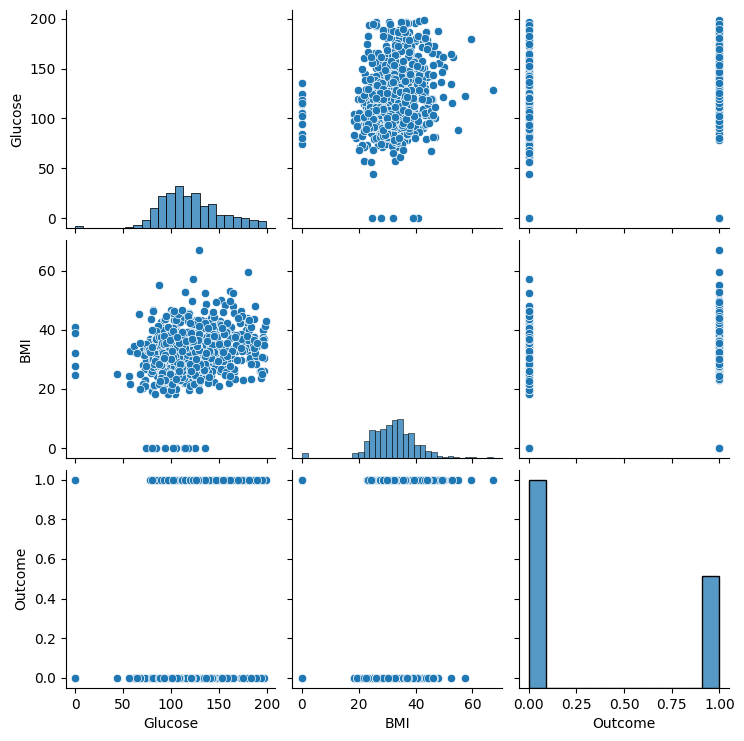

In [14]:
tabela = base_dados.drop(columns=['Pregnancies', 'BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction', 'Age'], axis=1)
tabela.head()
sns.pairplot(tabela)

plt.show()

# **Divisão em Conjunto de Treinamento e Teste**

In [16]:
# Dividindo a base em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

x = base_dados.drop("Outcome", axis=1)
y = base_dados["Outcome"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)

# **Definindo os atributos selecionados**

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Estatística F para classificação
selector = SelectKBest(score_func=f_classif, k=2)

X_new = selector.fit_transform(x_teste, y_teste)

# Obtem os índices dos atributos selecionados
selected_indices = selector.get_support(indices=True)

# Obtem os nomes dos atributos originais
feature_names = base_dados.columns
# Obtem os nomes dos atributos selecionados
selected_feature_names = [feature_names[i] for i in selected_indices]

# Imprime os nomes dos atributos selecionados
print(f'Atributos selecionados: {selected_feature_names}')

Atributos selecionados: ['Glucose', 'BMI']


# **Treinamento e avaliação do modelo Inicial**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treinamento do modelo
model = LogisticRegression()
model.fit(x_treino, y_treino)

# Avaliação do modelo
y_pred = model.predict(x_teste)

accuracy = accuracy_score(y_teste, y_pred)
conf_matrix = confusion_matrix(y_teste, y_pred)
class_report = classification_report(y_teste, y_pred)

print("Acurácia do Modelo: {:.2f}%".format(accuracy * 100))
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)


Acurácia do Modelo: 77.92%
Matriz de Confusão:
 [[89 10]
 [24 31]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.feature_selection import SelectKBest, chi2

# Seleção de atributos
selector = SelectKBest(score_func=chi2, k=4)
X_train_selected = selector.fit_transform(x_treino, y_treino)
X_test_selected = selector.transform(x_teste)



# Treinamento com os atributos selecionados

In [ ]:
# Treinamento do modelo com atributos selecionados
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_treino)

# Avaliação do modelo com atributos selecionados
y_pred_selected = model_selected.predict(X_test_selected)

accuracy_selected = accuracy_score(y_teste, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_teste, y_pred_selected)
class_report_selected = classification_report(y_teste, y_pred_selected)

print("Acurácia do Modelo com Atributos Selecionados: {:.2f}%".format(accuracy_selected * 100))
print("Matriz de Confusão com Atributos Selecionados:\n", conf_matrix_selected)
print("Relatório de Classificação com Atributos Selecionados:\n", class_report_selected)


Acurácia do Modelo com Atributos Selecionados: 78.57%
Matriz de Confusão com Atributos Selecionados:
 [[89 10]
 [23 32]]
Relatório de Classificação com Atributos Selecionados:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

# Crie e ajuste um modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(x_teste, y_teste)

# gerando a feature da base
feature_names = x.columns

# Gere um gráfico da árvore de decisão
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=feature_names,
                                class_names=selected_feature_names,
                                filled=True, rounded=True,
                                special_characters=True)

display(selected_feature_names)
# Obter uma representação em texto da árvore de decisão
tree_text = export_text(model,feature_names=None)
print(tree_text)

['Glucose', 'BMI']

|--- feature_1 <= 147.50
|   |--- feature_7 <= 30.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- feature_2 <= 23.00
|   |   |   |   |   |--- feature_1 <= 115.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  115.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- feature_6 <= 0.57
|   |   |   |   |   |--- feature_5 <= 34.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  34.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.57
|   |   |   |   |   |--- feature_1 <= 133.00
|   |   |   |   |   |   |--- feature_5 <= 41.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  41.25
|   |   |   |   |   |   |   |--- feature_2 <= 75.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 

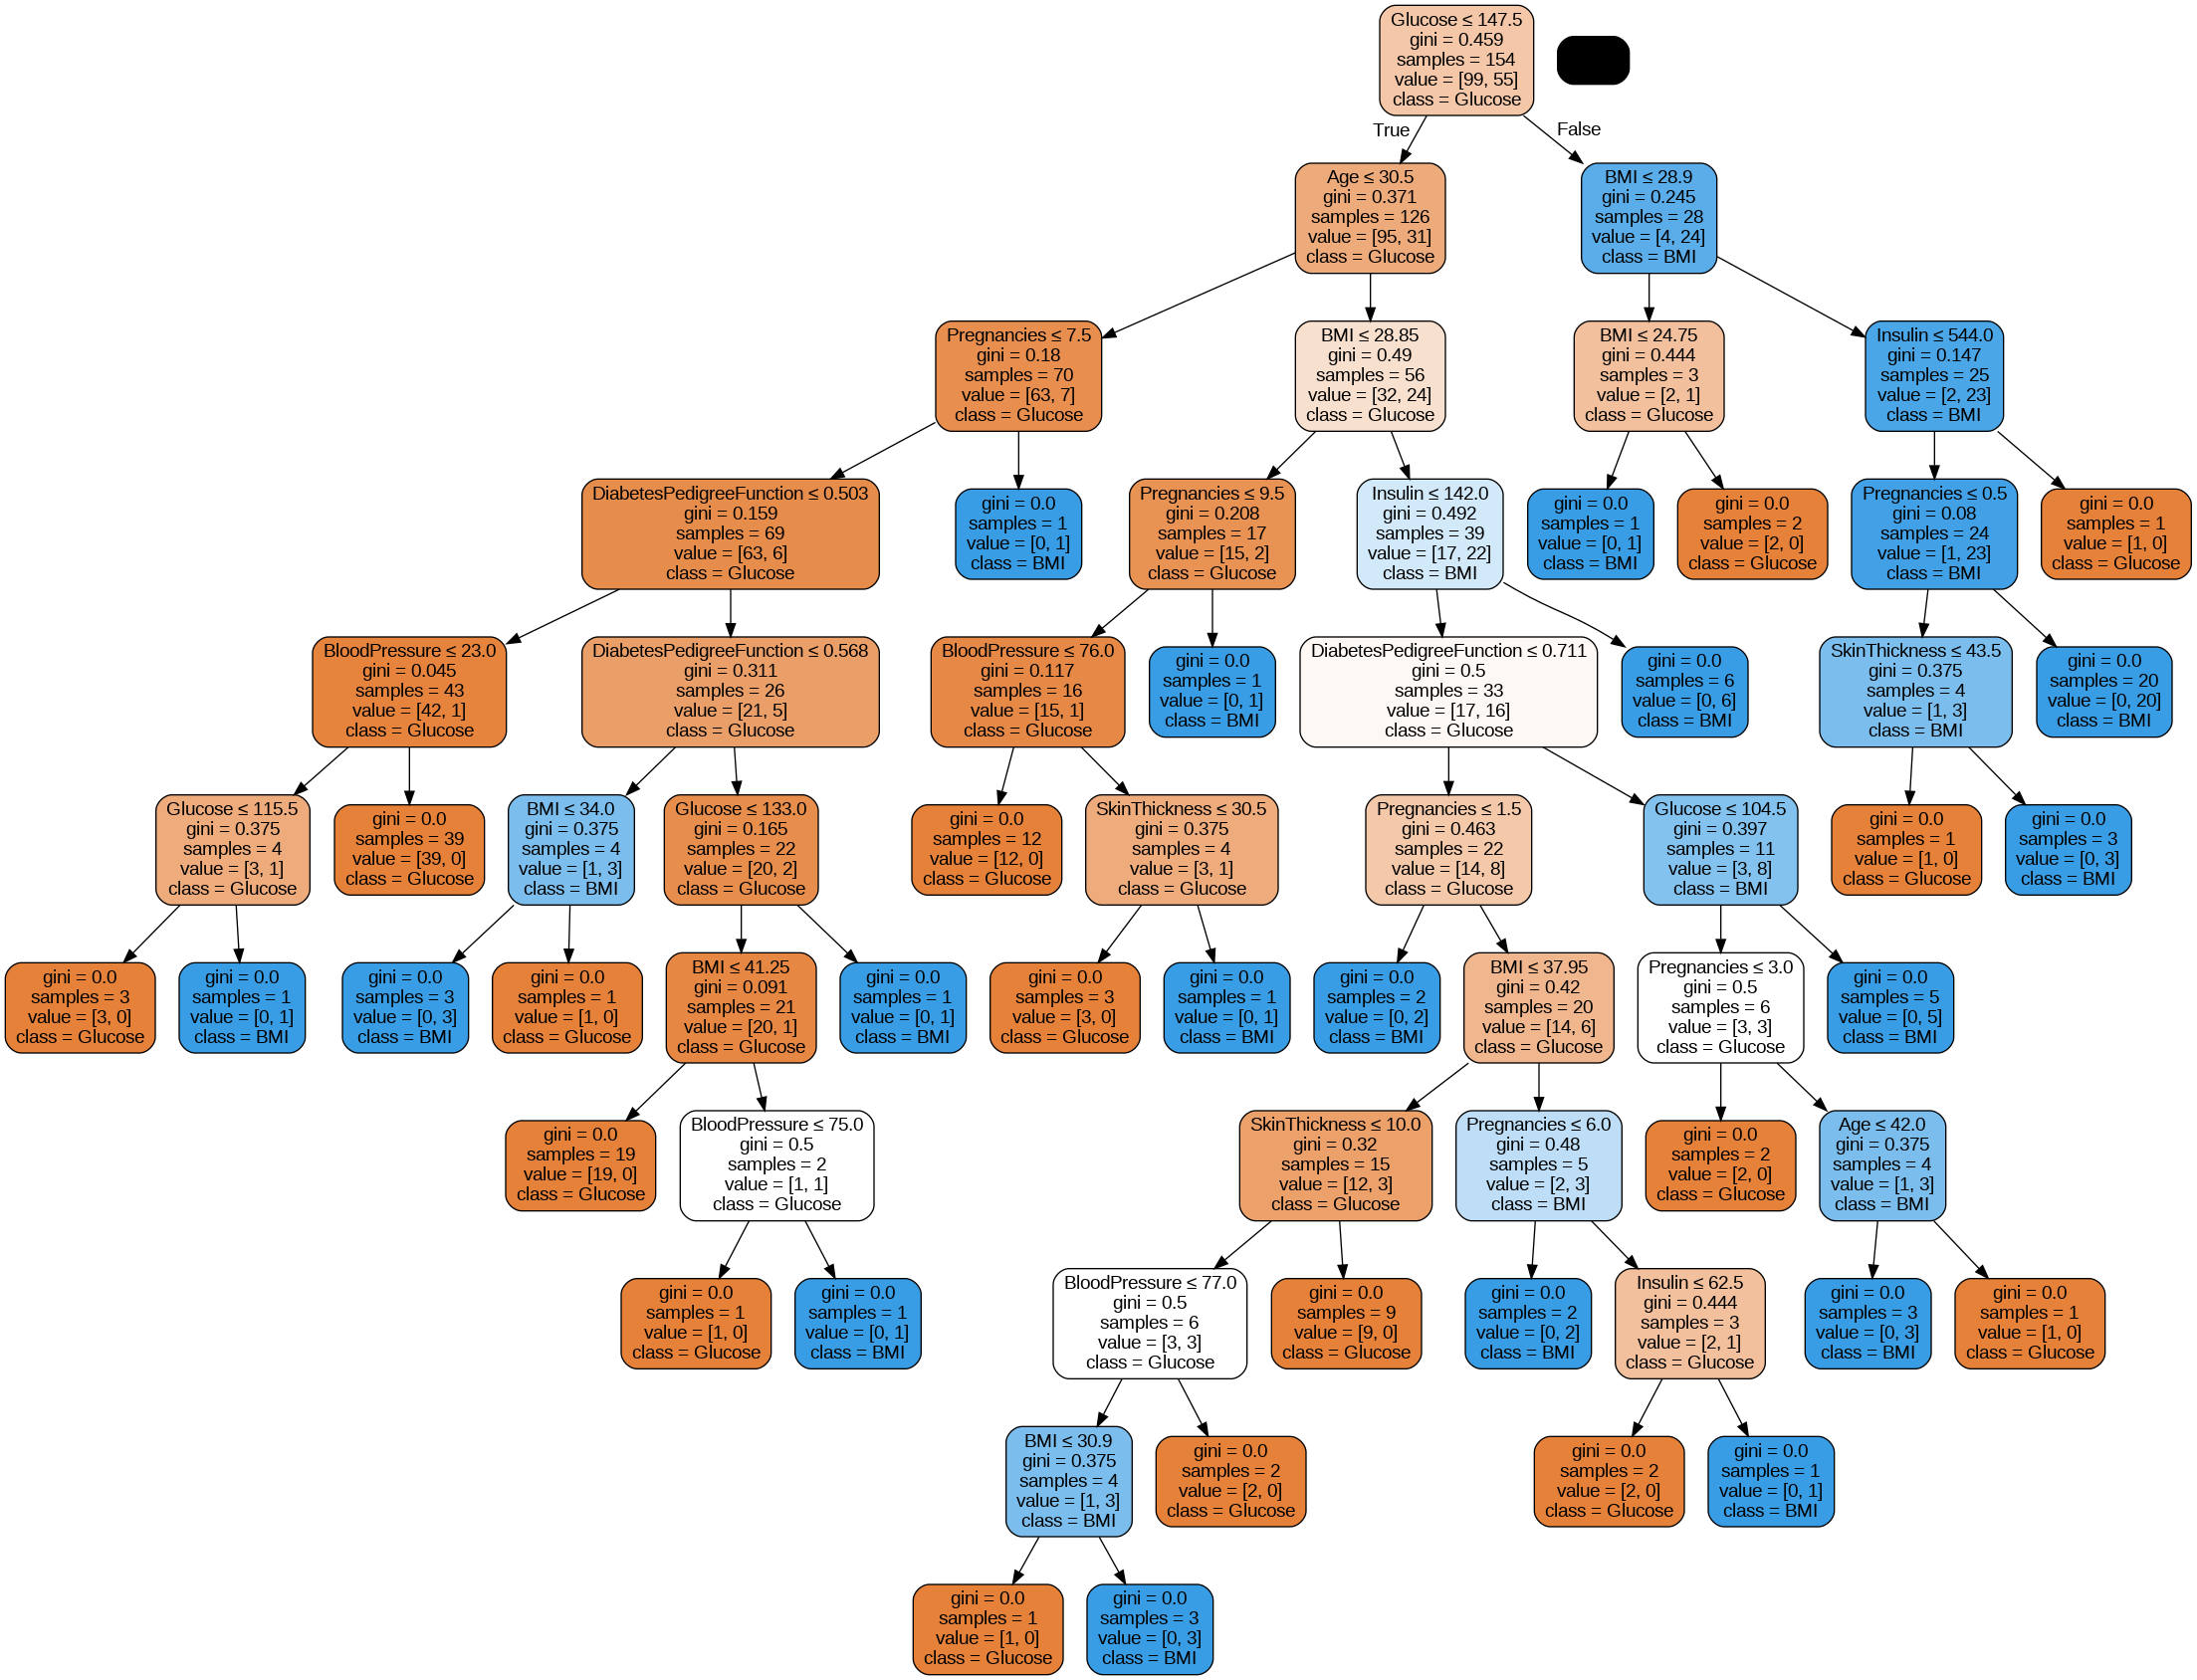

In [23]:
import pydotplus
from IPython.display import Image

# Crie a árvore em formato PDF usando pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("diabetes.pdf")

# Exiba a árvore de decisão (opcional)
Image(graph.create_png())

# **Discussão dos Resultados**

Os resultados mostraram que o modelo de regressão logística treinado com todos os atributos teve uma acurácia de aproximadamente 77.92%. O modelo de regressão logística treinado com os atributos selecionados ("Glucose" e "BMI") teve uma acurácia ligeiramente superior, atingindo cerca de 78.57%. A matriz de confusão e o relatório de classificação revelaram informações detalhadas sobre o desempenho do modelo, incluindo precisão, recall e F1-score para ambas as classes (com diabetes e sem diabetes)


# **Conclusão**

Concluindo as analises, a seleção de atributos ajudou a melhorar ligeiramente a acurácia do modelo, destacando a importância dos atributos "Glucose" e "BMI" na previsão de diabetes.
E consideramos que pode considerar a otimização de hiperparâmetros, a utilização de outros algoritmos de classificação e a coleta de mais dados, se possível.